# Predicting Job change of data spcientists

Source of data: https://www.kaggle.com/datasets/undersc0re/predict-the-churn-risk-rate

## Loading the dataset and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Data/churn.csv")

## Experimental Data Analysis

In [3]:
print(df.shape)

(36992, 24)


In [4]:
df.head()

,Unnamed: 0,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


In [5]:
## Unnamed:0 has to be dropped, security_number (unique values), joining date (we don't know the date
## data was published.),  
df = df.drop(columns=["Unnamed: 0", "referral_id", "security_no", "joining_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   region_category               31564 non-null  object 
 3   membership_category           36992 non-null  object 
 4   joined_through_referral       36992 non-null  object 
 5   preferred_offer_types         36704 non-null  object 
 6   medium_of_operation           36992 non-null  object 
 7   internet_option               36992 non-null  object 
 8   last_visit_time               36992 non-null  object 
 9   days_since_last_login         36992 non-null  int64  
 10  avg_time_spent                36992 non-null  float64
 11  avg_transaction_value         36992 non-null  float64
 12  avg_frequency_login_days      36992 non-null  object 
 13  p

### Categorical and Numerical Columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   region_category               31564 non-null  object 
 3   membership_category           36992 non-null  object 
 4   joined_through_referral       36992 non-null  object 
 5   preferred_offer_types         36704 non-null  object 
 6   medium_of_operation           36992 non-null  object 
 7   internet_option               36992 non-null  object 
 8   last_visit_time               36992 non-null  object 
 9   days_since_last_login         36992 non-null  int64  
 10  avg_time_spent                36992 non-null  float64
 11  avg_transaction_value         36992 non-null  float64
 12  avg_frequency_login_days      36992 non-null  object 
 13  p

In [7]:
categorical_columns = list(df.dtypes[df.dtypes == "object"].index)
categorical_columns

['gender',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'last_visit_time',
 'avg_frequency_login_days',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [8]:
numerical_columns = [col for col in df.columns if col not in categorical_columns and col != 'churn_risk_score']
numerical_columns

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'points_in_wallet']

In [9]:
###cleaning up spaces in categorical varibles
for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [10]:
## Number of unique values 
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

age
[18 32 44 37 31]
55

gender
['f' 'm' 'unknown']
3

region_category
['village' 'city' 'town' nan]
3

membership_category
['platinum_membership' 'premium_membership' 'no_membership'
 'gold_membership' 'silver_membership']
6

joined_through_referral
['no' '?' 'yes']
3

preferred_offer_types
['gift_vouchers/coupons' 'credit/debit_card_offers' 'without_offers' nan]
3

medium_of_operation
['?' 'desktop' 'smartphone' 'both']
4

internet_option
['wi-fi' 'mobile_data' 'fiber_optic']
3

last_visit_time
['16:08:02' '12:38:13' '22:53:21' '15:57:50' '15:46:44']
30101

days_since_last_login
[17 16 14 11 20]
27

avg_time_spent
[300.63 306.34 516.16  53.27 113.13]
25961

avg_transaction_value
[53005.25 12838.38 21027.   25239.56 24483.66]
36894

avg_frequency_login_days
['17.0' '10.0' '22.0' '6.0' '16.0']
1654

points_in_wallet
[781.75    nan 500.69 567.66 663.06]
23699

used_special_discount
['yes' 'no']
2

offer_application_preference
['yes' 'no']
2

past_complaint
['no' 'yes']
2

complaint_stat

### Target spread

The target variable here is churn

In [11]:
churn_spread = df.churn_risk_score.value_counts()
churn_spread

1    20012
0    16980
Name: churn_risk_score, dtype: int64

In [12]:
df.churn_risk_score.value_counts(normalize = True)

1    0.540982
0    0.459018
Name: churn_risk_score, dtype: float64

The target variable is kind of balanced.

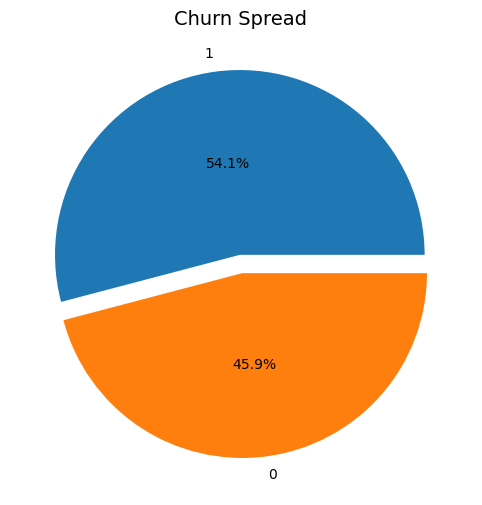

In [13]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = churn_spread.keys()
plt.pie(x=churn_spread.values, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Churn Spread", fontsize=14);

### Missing and Unknown Values

#### Cleaning up `Unknown` datapoints

In [16]:
low_cat = []
for col in categorical_columns :
    if df[col].nunique() < 20:
        low_cat.append(col)

In [17]:
low_cat

['gender',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

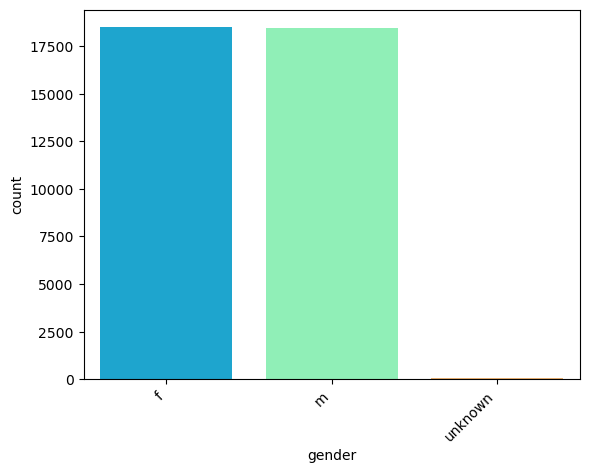

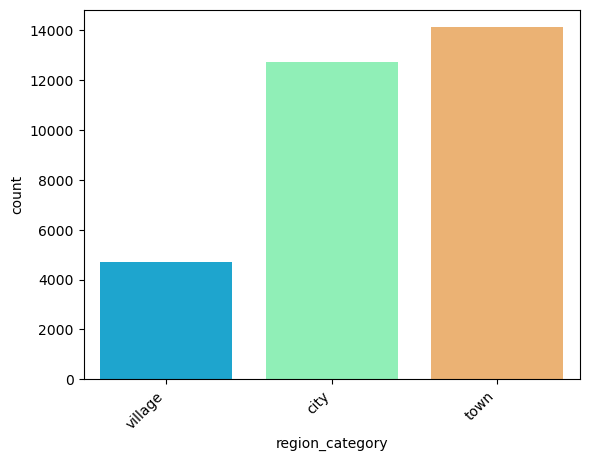

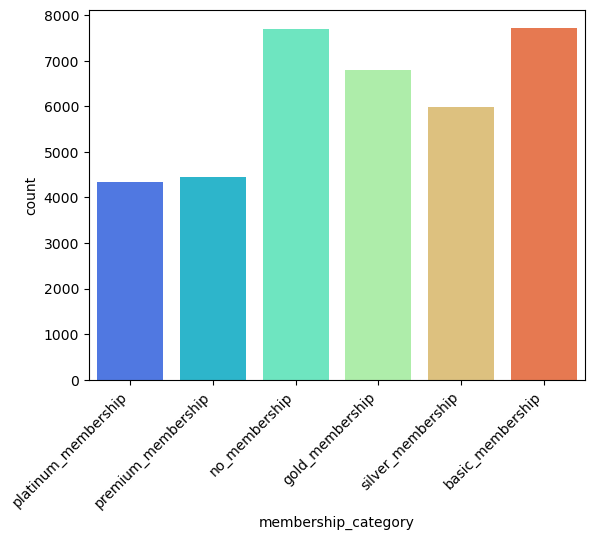

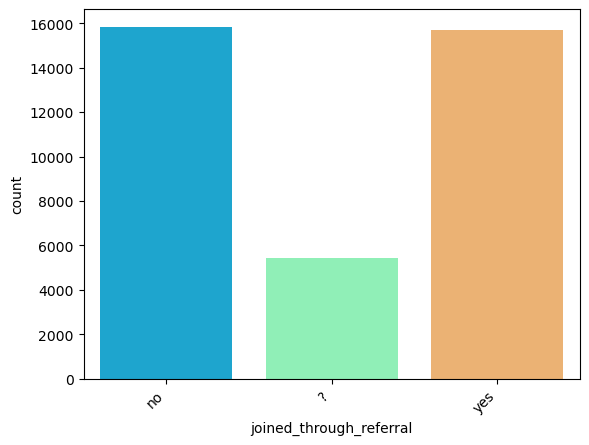

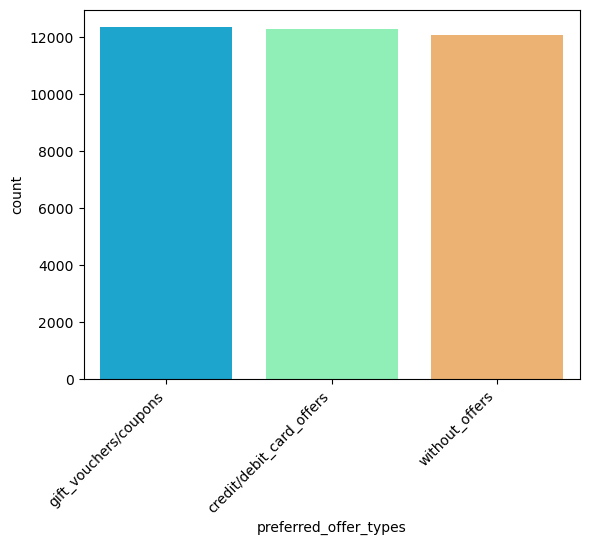

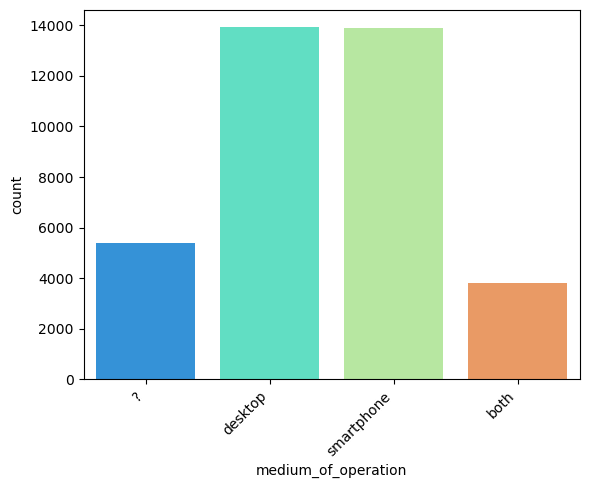

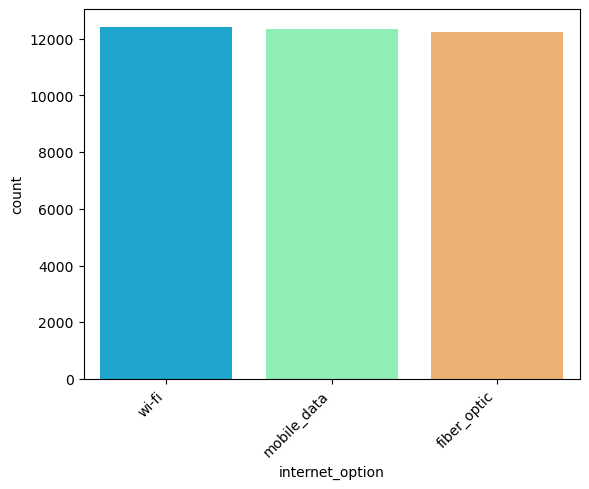

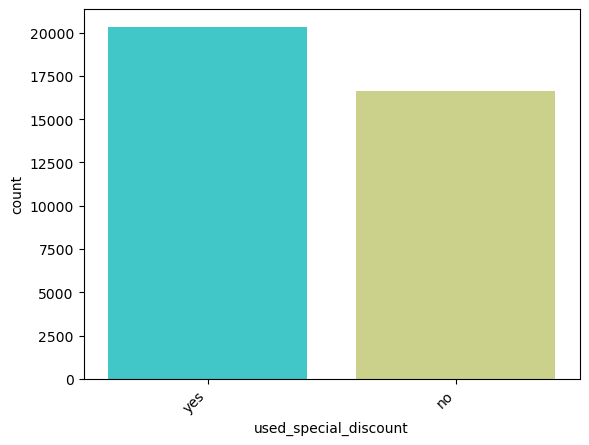

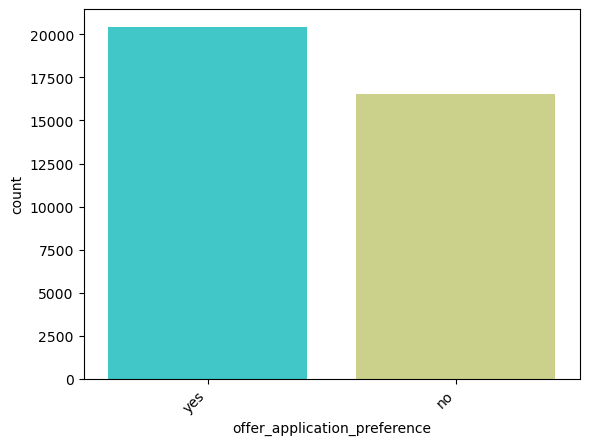

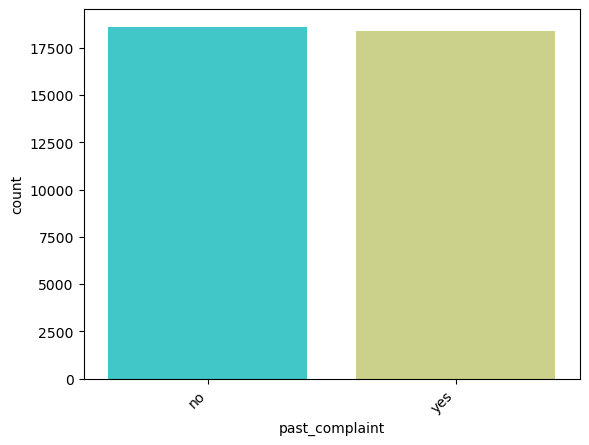

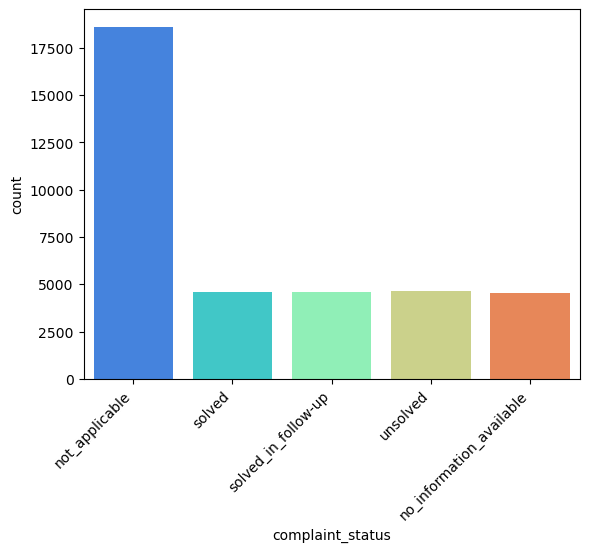

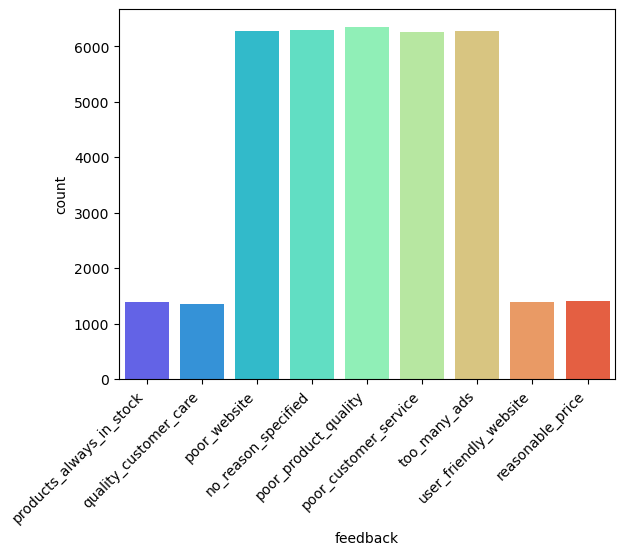

In [18]:
for col in low_cat:
    sns.countplot(x=col,data=df, palette='rainbow')
    plt.xticks(rotation = 45, ha="right")
    plt.show()

There are values that are 'unknown' in some of the columns in the dataset

<b>`Refferal Value count` and `Medium of operation`<b>

In [19]:
df.joined_through_referral.value_counts()

no     15839
yes    15715
?       5438
Name: joined_through_referral, dtype: int64

In [20]:
df.medium_of_operation.value_counts()

desktop       13913
smartphone    13876
?              5393
both           3810
Name: medium_of_operation, dtype: int64

*joined_through_referral and medium_of_operation have ? in their values*

The question mark will be changed to Null Values

In [21]:
for col in ['medium_of_operation', 'joined_through_referral']:
    df[col] = df[col].replace('?', np.NaN)

<b>`Gender`<b>

In [22]:
df.gender.value_counts()

f          18490
m          18443
unknown       59
Name: gender, dtype: int64

Unknown will bereplaced with Null values

In [23]:
df["gender"]=df["gender"].replace("unknown", np.NaN)

<b>`days_since_last_login`<b>

In [24]:
df.days_since_last_login.value_counts()

 12     2380
 13     2373
 14     2307
 15     2278
 11     2262
 10     2091
 16     2068
-999    1999
 9      1863
 17     1747
 8      1571
 18     1444
 7      1442
 19     1308
 6      1257
 5      1234
 20     1184
 21     1015
 4       998
 22      895
 3       852
 23      727
 2       613
 24      471
 1       328
 25      203
 26       82
Name: days_since_last_login, dtype: int64

-999 looks weird so that will be changed to a null value

In [25]:
df["days_since_last_login"]=df["days_since_last_login"].replace(-999, np.NaN)

<b>`Average time spent` and `Points in Wallet`<b>

In [26]:
df.avg_time_spent[df.avg_time_spent < 0]

28      -936.744818
41      -930.207844
60      -615.344319
79      -687.629574
116     -494.083877
            ...    
36794   -977.809108
36819   -910.568433
36956   -746.034591
36987   -650.682759
36988   -638.123421
Name: avg_time_spent, Length: 1719, dtype: float64

In [27]:
df.points_in_wallet[df.points_in_wallet < 0]

67      -549.357498
70       -44.597633
213      -38.084314
340     -288.247333
625     -301.998780
            ...    
35411   -108.057352
35883    -99.476870
35943    -43.109270
36414   -170.497210
36790   -317.024955
Name: points_in_wallet, Length: 136, dtype: float64

There are values lower than 0 in the both columns which does not make sense based on data context

In [28]:
len(df.avg_time_spent[df.avg_time_spent < 0])

1719

In [29]:
len(df.points_in_wallet[df.points_in_wallet < 0])

136

In [30]:
for col in ['avg_time_spent', 'points_in_wallet']:
    df[col]=df[col].apply(lambda x:x if x>=0 else np.nan)

<b>`Average Frequency Login days`<b>

In [31]:
df.avg_frequency_login_days.value_counts()

error                  3522
13.0                   1394
19.0                   1365
8.0                    1361
14.0                   1355
                       ... 
28.191570401129514        1
41.73357294995208         1
-11.515939810499656       1
45.71683637272365         1
27.8399274405269          1
Name: avg_frequency_login_days, Length: 1654, dtype: int64

In [32]:
df['avg_frequency_login_days']=df['avg_frequency_login_days'].apply(lambda x:x if x!='error' else -1)
df['avg_frequency_login_days']=df['avg_frequency_login_days'].astype('float')
df['avg_frequency_login_days']=df['avg_frequency_login_days'].apply(lambda x:x if x>=0 else np.nan)

In [33]:
df.avg_frequency_login_days.value_counts()

13.000000    1394
19.000000    1365
8.000000     1361
14.000000    1355
17.000000    1349
             ... 
46.065501       1
47.095617       1
3.342993        1
29.165844       1
27.839927       1
Name: avg_frequency_login_days, Length: 970, dtype: int64

In [34]:
df.isnull().mean().sort_values(ascending=False)

joined_through_referral         0.147005
region_category                 0.146734
medium_of_operation             0.145788
avg_frequency_login_days        0.113673
points_in_wallet                0.096751
days_since_last_login           0.054039
avg_time_spent                  0.046470
preferred_offer_types           0.007785
gender                          0.001595
used_special_discount           0.000000
feedback                        0.000000
complaint_status                0.000000
past_complaint                  0.000000
offer_application_preference    0.000000
age                             0.000000
avg_transaction_value           0.000000
last_visit_time                 0.000000
internet_option                 0.000000
membership_category             0.000000
churn_risk_score                0.000000
dtype: float64

#### Null Values

In [36]:
df.isnull().mean().sort_values(ascending=False)

joined_through_referral         0.147005
region_category                 0.146734
medium_of_operation             0.145788
avg_frequency_login_days        0.113673
points_in_wallet                0.096751
days_since_last_login           0.054039
avg_time_spent                  0.046470
preferred_offer_types           0.007785
gender                          0.001595
used_special_discount           0.000000
feedback                        0.000000
complaint_status                0.000000
past_complaint                  0.000000
offer_application_preference    0.000000
age                             0.000000
avg_transaction_value           0.000000
last_visit_time                 0.000000
internet_option                 0.000000
membership_category             0.000000
churn_risk_score                0.000000
dtype: float64

The column with the highest number of missing values has 14.7 of it's data missing. We will fill in with mode.

In [37]:
missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]

## Separate dataset into train and test

Best on practice, We have to split our dataset to Separate dataset into train and test. It is important to separate our data intro training and testing set.

Before we engineer features, some techniques learn parameters from data. It is important to learn these parameters only from the train set. This is to avoid over-fitting.

In [43]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [44]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [47]:
y_train = df_train.churn_risk_score
y_val = df_val.churn_risk_score
y_test = df_test.churn_risk_score

In [49]:
del df_train ["churn_risk_score"]
del df_val ["churn_risk_score"]
del df_test["churn_risk_score"]

## Feature Engineering